## Author : Bibek Shah Shankhar

###  Graduate Rotational Internship Program 
## The Sparks Foundation

## Prediction using Decision Tree Algorithm

In this task, we will use the `iris dataset` and create a Decision Tree Classifier to classify the different iris flower species using the Sepal length, Sepal width, Petal length and Petal width as  a feature.

The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.



In [1]:
## Importing Libaries
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

Creating a new column “Species” with target values from the dataset, I am using lambda function to apply a function so as to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”)

In [21]:
#Loading datasets
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


As we can see the data is imported successfully and first five rows from the dataframe is shown.


Now, lets see the shape of our dataset

In [3]:
data.shape

(150, 5)

In [4]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Visualization

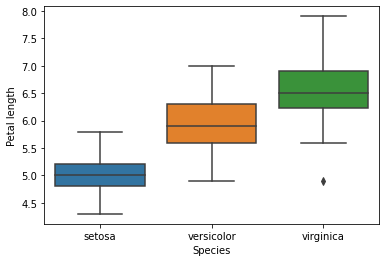

In [6]:
import seaborn as sns

sns.boxplot(x='Species',y='Petal length', data=data)
plt.show()

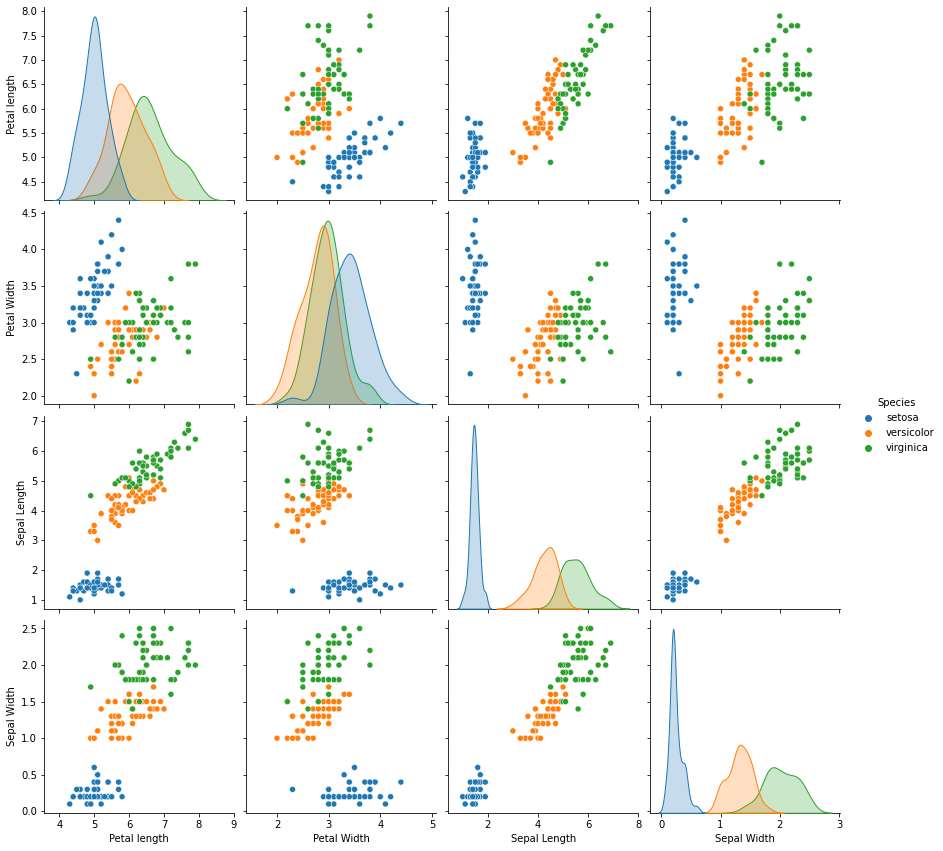

In [7]:
sns.pairplot(data, hue="Species", size=3);
plt.show()

Observations

1. The most useful features for distinguishing different flower species are petal length and petal width.
2. While Setosa (linearly separable) can be easily recognised, Virnica and Versicolor have some overlap (almost linearly seperable).

[]

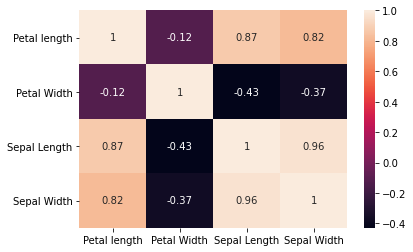

In [8]:
#Let's check correlation using heatmap
sns.heatmap(data.corr(),annot=True)
plt.plot()

Observations made -

* Petal length is highly related to petal width.
* Sepal lenth is not related sepal width

### Preparing the data for Model Building


In [9]:
# Forming the iris dataframe
X = pd.DataFrame(iris.data, columns=iris.feature_names)
print(X.head(5))

y= data['Species']
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object


## Model Selection

In [10]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=1)
model = DT.fit(X, y)


In [11]:
import getpass
import os

# Install required libraries
!pip install pydotplus
password = getpass.getpass()
command = "sudo apt-get install graphviz -y" #can be any command but don't forget -S as it enables input from stdin
os.system('echo %s | %s' % (password, command))


········


256

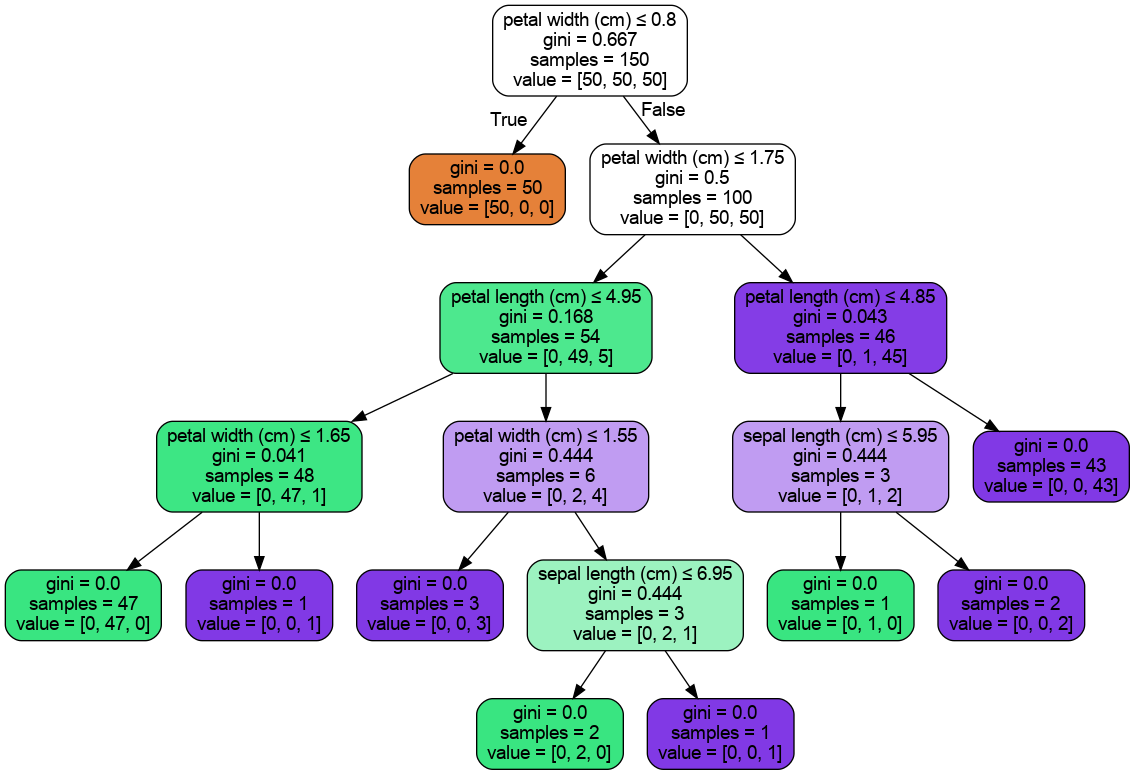

In [12]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.

In [13]:
DT.predict([[2.6, 2.8, 1.6, 6.9]])

array(['versicolor'], dtype=object)

In [14]:
DT.predict([[0.5, 1.9, 2.4, 1.4]])

array(['versicolor'], dtype=object)

In [15]:
DT.predict([[4, 6, 2, 4]])

array(['versicolor'], dtype=object)

In [16]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
DT.predict([[5.1, 3.5, 1.4, 0.2]])

array(['setosa'], dtype=object)

In [18]:
DT.predict([[4.9, 3.0, 1.4, 0.2]])

array(['setosa'], dtype=object)

As from the above data we can see that our classifier are predicting correctly.